# Introduction to neural network classification with TensorFlow

In this notebook We're going to learn how to write neural networks for classification problems. 

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  
   * Binary classification
   * Multiclass classification
   * Multilabel classifcation

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

### Our data is a little hard to understand right now... let's visualize it1

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [17]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

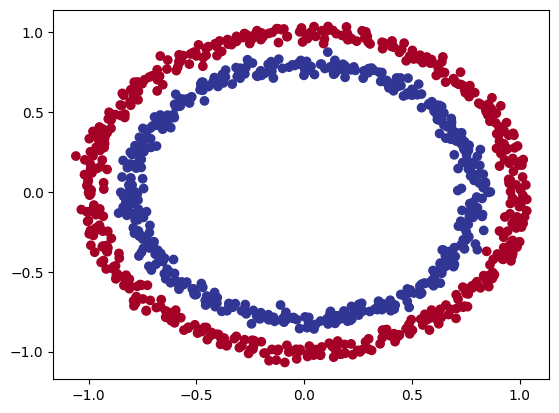

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

&#x1F6E0; **Exercise:** Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.99251&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when youi change different hyperparameters.

## Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [11]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.13.0'

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.2587 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.2735 - accuracy: 0.5040
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4920


In [14]:
# Let's try and improve our model by training for longer...
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)


In [16]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000


[0.6955869793891907, 0.5]

In [18]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our Model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might wwant to add more layers or  increase the number of hidden units  within the layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layers with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y,epochs=100, verbose=0)

In [20]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000


[0.6966643333435059, 0.5]

To visualize our model's predictions, let's create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, feature (X) and labels (y)
* Create a meshgrid of the different X values 
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [31]:
import numpy as np

def plot_decision_boundary(model, X,y):
    '''
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. 
    
    '''
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() +0.1
    xx,yy =np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # check for multi-class
    if len(y_pred[0])>1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0],X[:,1], c=y, s = 40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


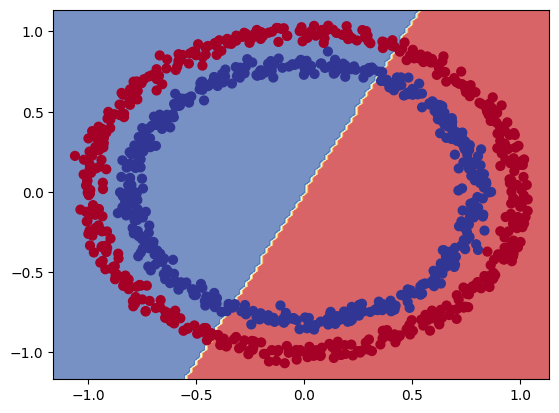

In [32]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [35]:
# Lets see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y= X+100


# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train= y_regression[:150]
y_reg_test= y_regression[150:]

# Fit our model to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait.. we compiled our model for a binary classification problem..
But... Were now working on a regression problem, lets6' change the model to suit our data

In [37]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train,y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 550.8594 - mae: 550.8594
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 424.4821 - mae: 424.4821
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 302.4141 - mae: 302.4141
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 175.3125 - mae: 175.3125
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 59.9539 - mae: 59.9539
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 87.2893 - mae: 87.2893
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 88.2479 - mae: 88.2479
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 52.3665 - mae: 52.3665
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 51.3590 - mae: 51.3590
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 48.5743 - mae: 48.5743
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 4ms/step - loss: 38.6527 - mae: 38.6527
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 39.3787 - mae: 39.3787
Epoch 89/100
5/5 [==============================] - 0s 6ms/step - loss: 38.5566 - mae: 38.5566
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.4582 - mae: 38.4582
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5388 - mae: 38.5388
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3536 - mae: 38.3536
Epoch 93/100
5/5 [==============================] - 0s 0s/step - loss: 38.9231 - mae: 38.9231
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6247 - mae: 38.6247
Epoch 95/100
5/5 [==============================] - 0s 0s/step - loss: 38.3391 - mae: 38.3391
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7176 - mae: 38.7176
Epoch 97/100
5/5 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 0s/step


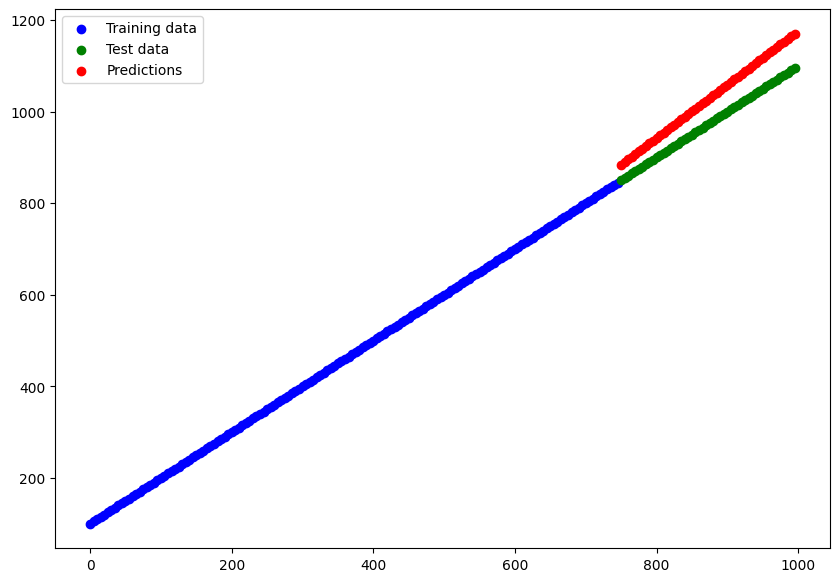

In [39]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model6's predictions against ouir regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test, c= "g", label="Test data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
    
# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0140 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0047 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9848 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9316 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7375 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1743 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2682 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1046 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8803 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5002 - accuracy: 0.4750
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4600
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5070
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5040
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4620
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4510
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4800
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5030
Epoch 93/100


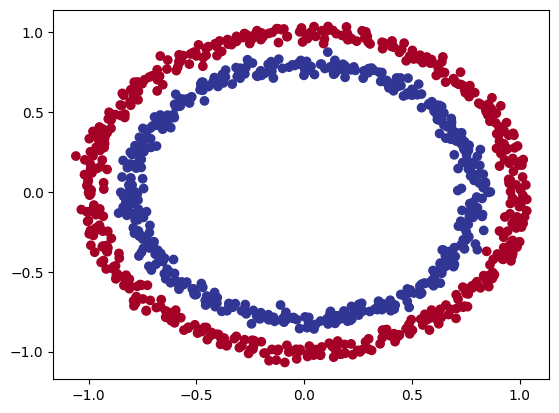

In [48]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


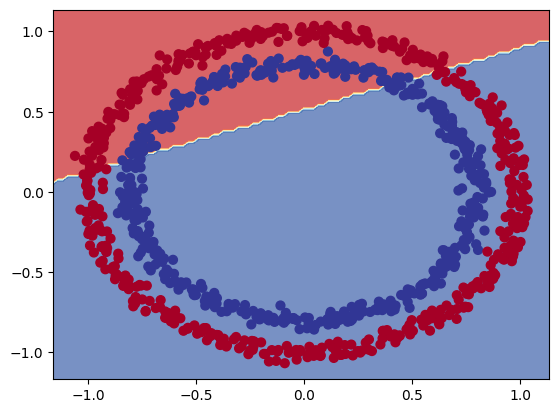

In [49]:
# Check the decision boundary for our lastes model
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)



Lets try build our first neural network with a non-linear activation function.


In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation.
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history= model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0945 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0804 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0580 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0154 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0074 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9943 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9915 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9894 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9876 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9771 - accuracy: 0.4890
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.0847 - accuracy: 0.4730
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0227 - accuracy: 0.4690
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0053 - accuracy: 0.4720
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9675 - accuracy: 0.4690
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9278 - accuracy: 0.4710
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8777 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8191 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8053 - accuracy: 0.4700
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7788 - accuracy: 0.4700
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7266 - accuracy: 0.4720
Epoch 93/100


In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid'),      
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
               metrics=["accuracy"])
# 3. Fit the model
model_6.fit(X,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5270
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5170
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5220
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5990
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6130
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6200
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7090
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7480
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8660
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8650
Epoch 11/50
32/32 [

313/313 [==============================] - 1s 1ms/step
doing binary classification


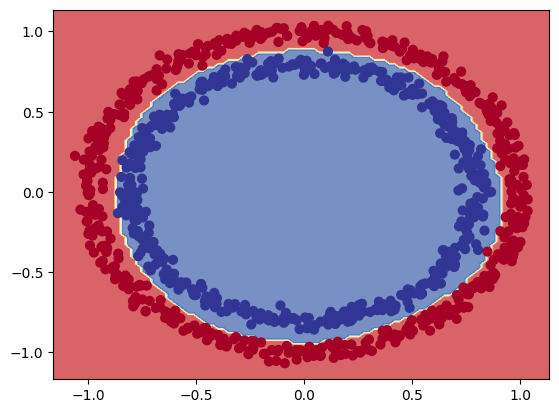

In [74]:
# Check the decision boundary for our lastes model
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [68]:
# Time to replicate the multi-layer neural network from TensorFlow Playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

# 3. Fit the model
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.2171 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.4590
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.4340
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.4250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4400
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4490
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5230
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 3.3893 - accuracy: 0.5930
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2942 - accuracy: 0.5990
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2292 - accuracy: 0.5980
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7812 - accuracy: 0.5700
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6900 - accuracy: 0.5550
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6052 - accuracy: 0.5450
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5826 - accuracy: 0.5450
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4098 - accuracy: 0.5370
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1264 - accuracy: 0.5320
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4482 - accuracy: 0.5310
Epoch 93/100


313/313 [==============================] - 1s 1ms/step
doing binary classification


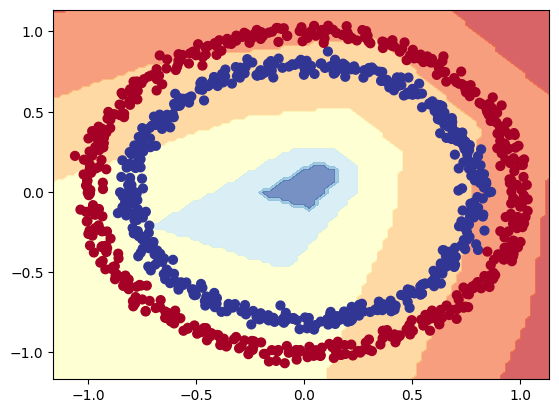

In [66]:
#  How do our model predictions look?

plot_decision_boundary(model_7,
                      X,
                      y)

In [70]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5070
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5150
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5110
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8750
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8820
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8800
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8900
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8950
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.9030
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.9010
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.9090
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.9140
Epoch 93/100


In [71]:
# 4. Evaluate our model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.9430


[0.33415648341178894, 0.9430000185966492]

313/313 [==============================] - 1s 1ms/step
doing binary classification


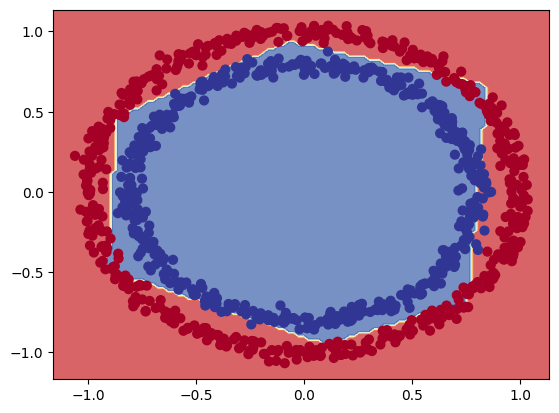

In [72]:
# Let6's visualize our metrics
plot_decision_boundary(model_8,
                      X,y)

&#x1F914; **Question:** Whats wrong with the predictons we6've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?


&#x1F511; **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept o linear and non-linear functions(or lines), lets see them in action

In [76]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

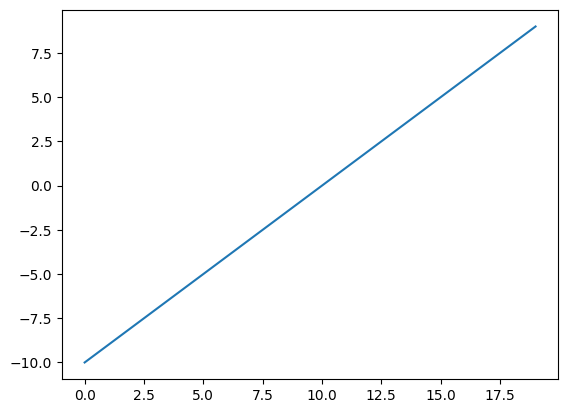

In [79]:
# Visualize our toy tensor
plt.plot(A);

In [80]:
# Lets start by replicating sigmoid - sigmoid(x) = 1/(1 + exp(-x))

def sigmoid(x):
    return 1/(1.+ tf.exp(-x))

# Use te sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

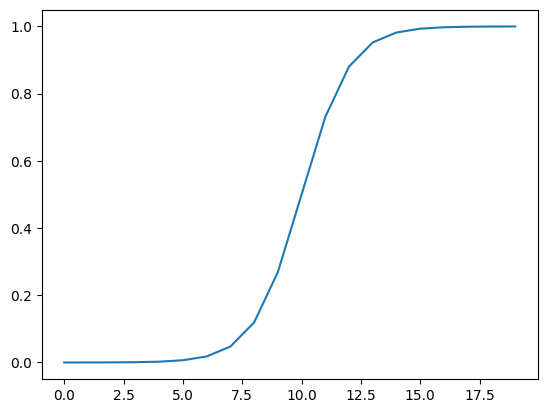

In [81]:
# Plot ouri toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [82]:
# Lets recreate relu function
def relu(x):
    return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

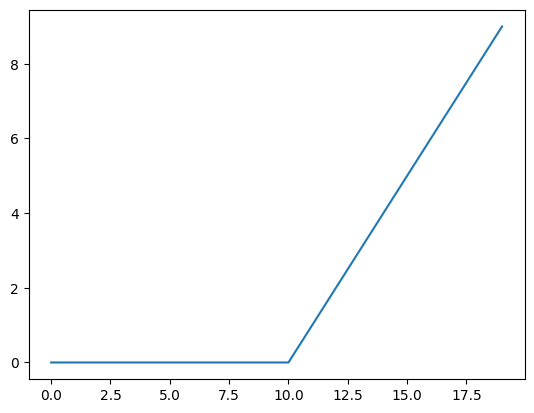

In [84]:
# Plot ReLu -modified tensor

plt.plot(relu(A));

In [85]:
# Lets try the linear activation tensor
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

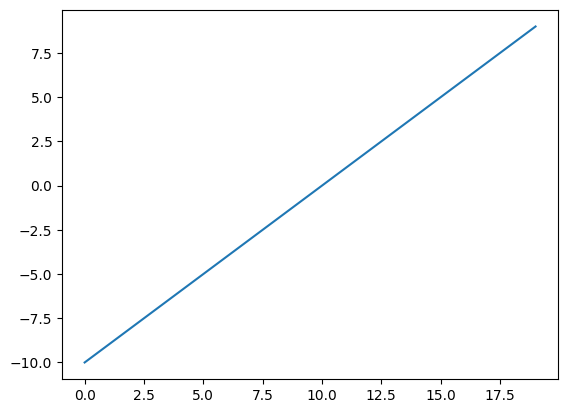

In [86]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

So far weve been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So lets create a training and test set.

In [87]:
# Check how many examples we have
len(X)

1000

In [91]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [92]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [101]:
# Lets recreate a model to fit on the training data and evaluate on the tests set

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_6)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(2, activation="tanh"),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

# 2. Model Compilation
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
               metrics=["accuracy"])
# 3. Fit model
history = model_9.fit(X_train,y_train,epochs=50)



Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5088
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.4950
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5550
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5800
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5425
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6112
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.6637
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7063
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7163
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7663
Epoch 11/50
25/25 [

In [102]:
# 4. Evaluate the model on the test dataset
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9900


[0.026944952085614204, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


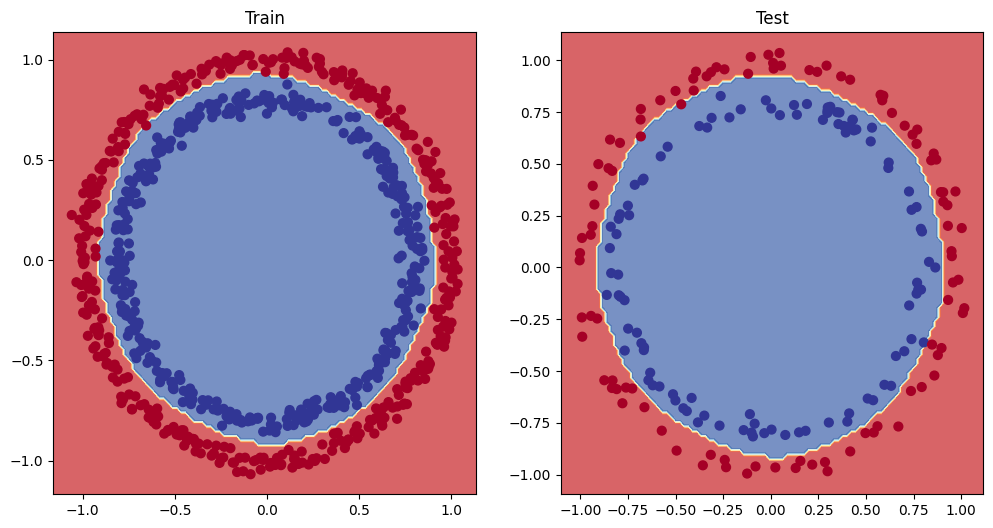

In [103]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)

In [94]:
model_6.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 12        
                                                                 
 dense_69 (Dense)            (None, 2)                 10        
                                                                 
 dense_70 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
## Plot the loss (or training) curves

pd.DataFrame(history.history)

,loss,accuracy
0,0.694695,0.50875
1,0.692494,0.49500
2,0.686296,0.55500
3,0.682442,0.58000
4,0.674336,0.54250
5,0.658186,0.61125
6,0.638125,0.66375
7,0.604408,0.70625
8,0.569011,0.71625
9,0.531853,0.76625


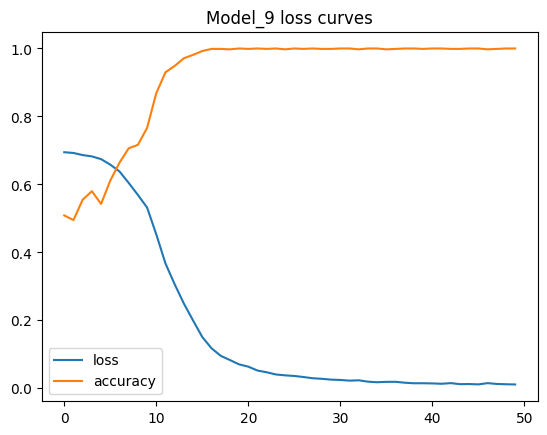

In [106]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves");

&#x1F511; **Note:** For many problems, the loss function going down means the model is improving (the predictions its making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback**  you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we6're practicing building models here)
*A modified loss curves plot.

In [111]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_9)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(2, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

# Create a learningg rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit model (passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                         y_train,
                         epochs = 100,
                         callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7525 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6400 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6012 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6062 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6150 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.5125 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.5725 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.5750 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.4

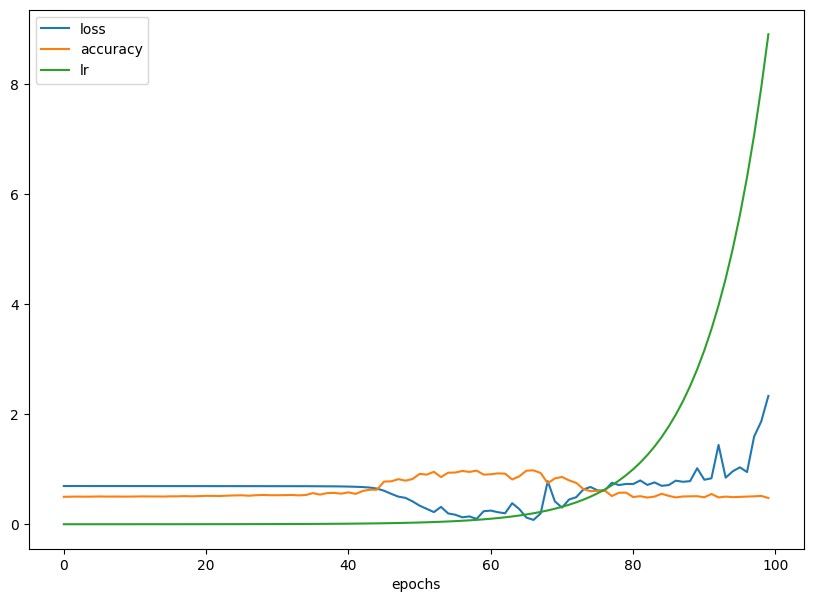

In [112]:
# Checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs");

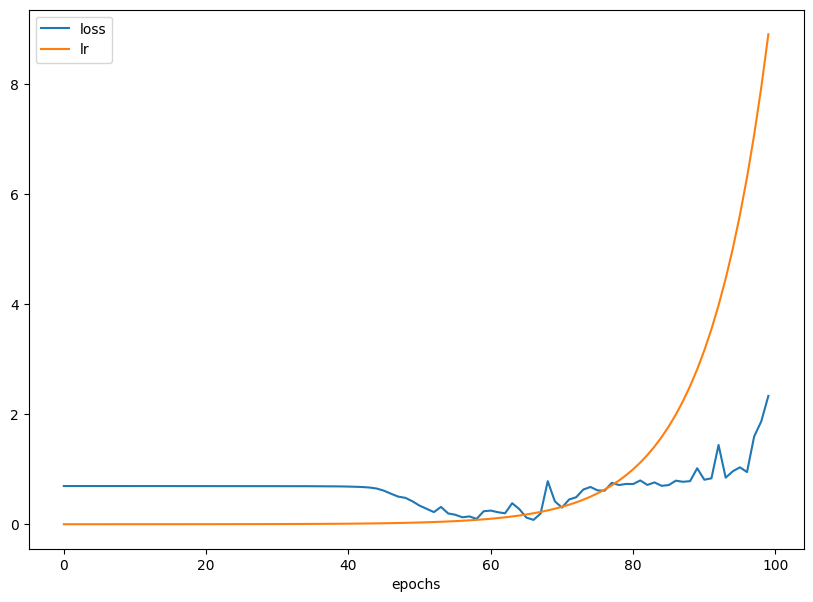

In [121]:
# Plot the learning rate to loss
pd.DataFrame(history_10.history).iloc[:,[0,2]].plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs. Loss')

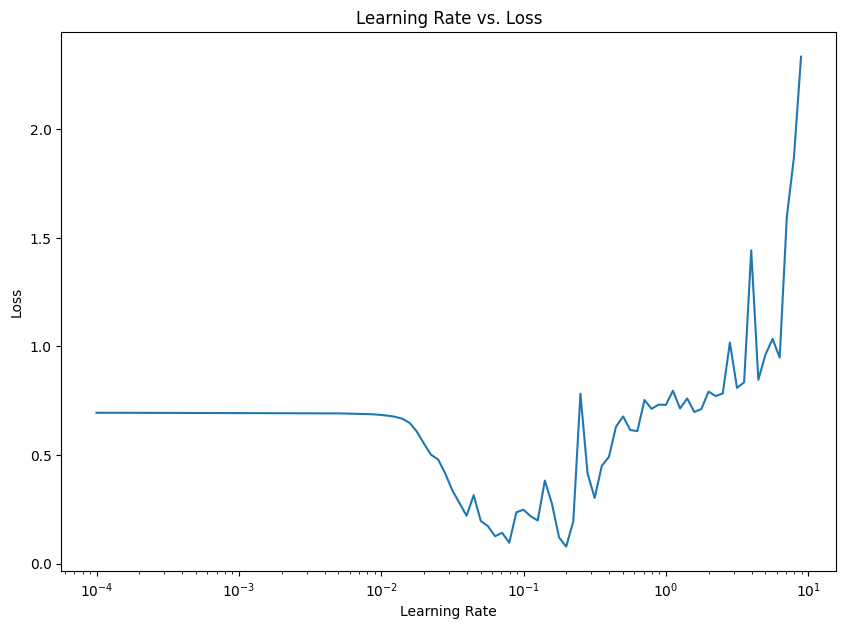

In [123]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [124]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [135]:
# Learning rate used before
3e-2

0.03

In [137]:
# Lets try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(2, activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model with ideal learning rate
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                metrics =["accuracy"])

# Fit model for 20 epochs
history_11 = model_11.fit(X_train,y_train, epochs =25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.5200
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5512
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6025
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6637
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7600
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7675
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8062
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.9400
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.9300
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9538
Epoch 11/25
25/25 [

In [138]:
# Evaluate model_11 on the test dataset
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9950


[0.0525660365819931, 0.9950000047683716]

In [139]:
# Evaluate model_11 on the test dataset
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9900


[0.05144338682293892, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


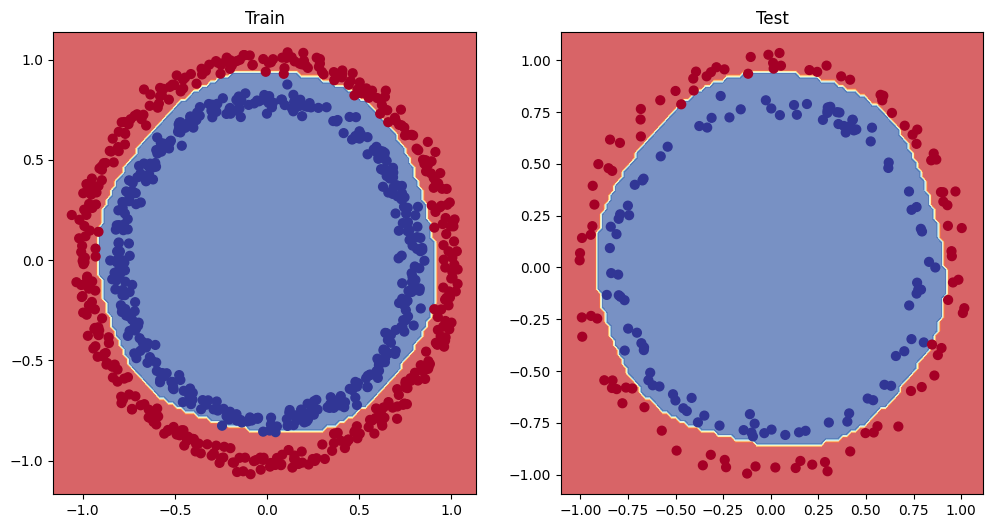

In [140]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11,X_test,y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
    
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit learn)

In [153]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
#accuracy_score(y_test,model_11.predict(X_test))

In [154]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test,y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9950
Model loss on the test set: 0.0525660365819931
Model accuracy on the test set: 99.50%


How about a confusion matrix?


Oops... looks like our predictions array has come out in **predictions probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [161]:
# Make predictions
y_preds = model_11.predict(X_test)
y_preds = y_preds>0.5

confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 1ms/step


array([[ 99,   1],
       [  0, 100]], dtype=int64)

In [162]:
# Precision
precision_score(y_test, y_preds)

0.9900990099009901

In [163]:
# Recall
recall_score(y_test, y_preds)

1.0

In [165]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



## How about we prettify our confusion matrix?

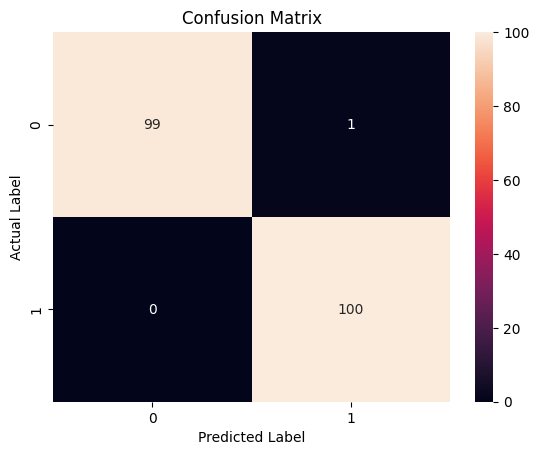

In [177]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds),annot=True,fmt='.4g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if youi have 3 different classes, its multi-class classification.
* It also means if youi have 100 different classes, its multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different 

In [180]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

 9707520/26421880 [==========>...................] - ETA: 34:33

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f'Training label:\n{train_labels[0]}\n')

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check out samples label
train_labels[7]

In [ ]:
# Create a small list so we can index onto our training labels so they6're human-readable
class_name = ["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt"]

In [ ]:
# Plot an example image and its label
index_of_chtrain_test_splite = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])